Semiconductor Project

Authors:
- Aaron Carman
- Zachary Coon
- Clifton Dey

What does this shit do besides ruin underwear? We're not quite sure.
Clif I swear to God if you add more parentheses.

TODO:
1. A lot

Imports, Graph Properties, and Fundamental Constants

Doesn't do anything very interesting. Refer to comments.

In [18]:
import matplotlib.pyplot as plt         # takes care of data visualization
import numpy as np                      # gives more math operations
import matplotlib                       # gives access to more advanced tools
from ipywidgets import interact         # gives us widgets to use
import nbinteract as nbi

rcParams = matplotlib.rcParams          # pull current graph parameters
rcParams['font.size'] = 8.0            # set default font to 10
rcParams['axes.titlesize'] = 16.0       # change title font to 20
rcParams['font.weight'] = 'normal'      # set default font to normal
rcParams['axes.titleweight'] = 'bold'   # set title font to bold

q = 1.602e-19       # elementary charge
eps0 = 8.85e-14     # permittivity of free space (eps0)
KTq = 0.02585       # thermal voltage at 300K

def square(x):
    return x*x

interact(square, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.square(x)>

Material Properties

These are all the material properties that we need (and some that we don't currently need, but somehow I still hold out faith that there's a point to them). In the future, what we would like to do is have numerous materials stored somewhere that we can pull from. Maybe querying a database like NSM, or just manually entering in the properties in an Excel file or multiple files. Who knows.

In [19]:
Me = 0.18           # effective mass of electron (it's not used anywhere Clif wtf)
Mh = 1              # effective mass of hole (not used)
Nc = 1.2e18         # effective DOS of conductance band (not used)
Nv = 4.6e19         # effective DOS of valence band (not used)
Ni = 1e-10          # intrinsic carrier concentration
eps = 8.9*eps0      # material permittivity
Ec = 4.1E6          # critical E-field breakdown in V/cm

Na = np.logspace(15, 19, 100)   # acceptor doping that we want to sweep
Nd = np.logspace(15, 19, 100)   # donor doping that we want to sweep

Main Section of Code

This is Aaron's time to shine. This section runs all the simulations needed and visualizes them using an imshow plot.

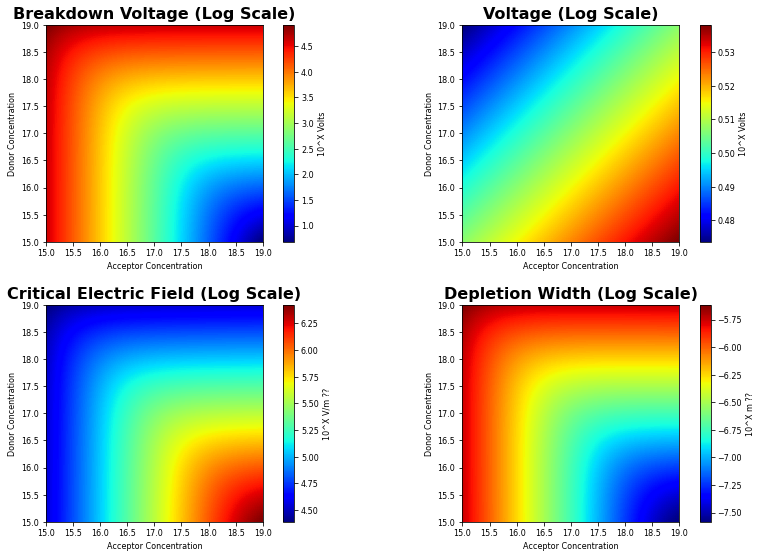

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... 

Converting notebook...



Successfully converted!

<a href="main.html" target="_blank" download>Click to download your webpage.</a>

To host your webpage, see the documentation:
<a href="https://www.nbinteract.com/tutorial/tutorial_publishing.html"
        target="_blank">
    https://www.nbinteract.com/tutorial/tutorial_publishing.html
</a>


In [20]:
Ncols = len(Na)         # store the number of columns
Nrows = len(Nd)         # and the number of rows

Voltage = np.empty((Nrows, Ncols))              # empty matrix for forward voltage
Depletion = np.empty((Nrows, Ncols))            # empty matrix for depletion width
BreakdownVoltage = np.empty((Nrows, Ncols))     # empty matrix for breakdown voltage
ElectricField = np.empty((Nrows, Ncols))        # empty matrix for critical electric field

for ii in range(0, Ncols):                      # for every element 
    for rr in range(0, Nrows):                  # in each matrix
        ln = np.log((Na[ii]*Nd[rr])/(Ni**2))    # calculate forward voltage
        Voltage[rr, ii] = KTq*ln                
        
        two_E = (2*eps)/q
        W0 = np.sqrt((two_E*Voltage[rr,ii]*((1/Na[ii]+1/Nd[rr]))))  # calculate depletion width
        Depletion[rr, ii] = W0*1e-2

        qn = q*Nd[rr]/eps
        N = (Na[ii]/(Nd[rr]*(Nd[rr]+Na[ii])))       # calculate carrier concentration
        
        ElectricField[rr,ii] = (qn*np.sqrt(two_E*N*Voltage[rr,ii]))     # calculate E-field
        
        V = (((Ec/qn)**2)/(two_E*N))
        BreakdownVoltage[rr,ii] = Voltage[rr,ii]-V          # calculate breakdown voltage


fig, ax = plt.subplots(2,2)             # 2x2 subplot array for now
fig.set_size_inches((12,8))             # set the size of the whole figure

ax[0,0].set_title('Breakdown Voltage (Log Scale)')          # set title
ax[0,0].set(xlabel='Acceptor Concentration', ylabel='Donor Concentration')  # set x and y labels
# plot a color plot spanning the whole range we have simulated
im = ax[0,0].imshow(np.log10(abs(BreakdownVoltage)), extent=[min(np.log10(Na)), max(np.log10(Na)), min(np.log10(Nd)), max(np.log10(Nd))], cmap='jet')
# add a colorbar
cbar = plt.colorbar(im, ax=ax[0,0])
# add a label
cbar.set_label('10^X Volts')

# repeat the process several times
ax[0,1].set_title('Voltage (Log Scale)')
ax[0,1].set(xlabel='Acceptor Concentration', ylabel='Donor Concentration')
im = ax[0,1].imshow(np.log10(abs(Voltage)), extent=[min(np.log10(Na)), max(np.log10(Na)), min(np.log10(Nd)), max(np.log10(Nd))], cmap='jet')
cbar = plt.colorbar(im, ax=ax[0,1])
cbar.set_label('10^X Volts')

ax[1,0].set_title('Critical Electric Field (Log Scale)')
ax[1,0].set(xlabel='Acceptor Concentration', ylabel='Donor Concentration')
im = ax[1,0].imshow(np.log10(abs(ElectricField)), extent=[min(np.log10(Na)), max(np.log10(Na)), min(np.log10(Nd)), max(np.log10(Nd))], cmap='jet')
cbar = plt.colorbar(im, ax=ax[1,0])
cbar.set_label('10^X V/m ??')

ax[1,1].set_title('Depletion Width (Log Scale)')
ax[1,1].set(xlabel='Acceptor Concentration', ylabel='Donor Concentration')
im = ax[1,1].imshow(np.log10(abs(Depletion)), extent=[min(np.log10(Na)), max(np.log10(Na)), min(np.log10(Nd)), max(np.log10(Nd))], cmap='jet')
cbar = plt.colorbar(im, ax=ax[1,1])
cbar.set_label('10^X m ??')

fig.tight_layout(pad=2.0)

plt.show()

nbi.publish('aacarman/SemiProject/main', 'main.ipynb')